#  Neural Network

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

![alt](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTMFej-txyELjpoLz5ChqilQsNb6L3F6Qc5Q&usqp=CAU)

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.



In [12]:
from tensorflow.keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) =fashion_mnist.load_data()



The data structures ```train_x``` and ```test_x``` are stored as 3 dimensional tensors. 
 


In [18]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0

---

## Image Flattening

Simple **dense neural networks** pass feature vectors into the 0-th (the first) layer of the computational graph represented by the neural network structure as column vectors. This 0-th layer is essentially the same as with single neuron models. In order to feed our images into such a network we must **flatten** the matrix into a column vector.


We can do this for each image matrix that we are considering by calling the ```flatten()``` method together with the ```reshape(784, 1)``` method to insure it is a column vector. Note, that each image matrix is 28 by 28, and so, $784 = 28 \times 28$ is the number of rows in the flattened matrix column vector. The numerical values in the flattened training and testing data matrices vary between 0 and 255. These large differences in possible values can lead to problems when training the weights and the biases of the neural network. A quick and dirty fix will be to scale all data to belong in the interval $(0, 1)$, i.e., divide the entries by the largest possible value; in this case 255. 



In [ ]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()


In [19]:
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)
    

---

## Building the Network Architecture 
For our purposes, we will build a multilayered **fully connected**, or **dense**, neural network with $L$ layers, $784$ input notes, $L-2$ hidden layers of arbitrary size, and $10$ output nodes. 


For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C(W, b) = \frac{1}{2}\sum_{k=1}^{10}(\hat{y}^{(i)}_k - y^{(i)}_k)^2.
$$

Our goal will be to write a custom Python class implementing our desired structure. However, before doing so, we first sequentually write functions to better understand the process of programming the following:

* Initializing the weights and biases of each layer
* The feedforward phase
* Calculation of the cost function
* Calculation of the gradient
* Iterating stochastic gradient descent

First we will define our sigmoid activation function, its derivative, and the mean squared error for a single instance of training data. Do this by running the following code. 

---

In [20]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

---

Next we will write a custom function to initialize the weight matrices and bias column vectors for a dense neural network. Do this by running the following code. 


---

In [21]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        # The scalling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

---

## Feedforward Phase

For $\ell = 1, \dots, L$, each layer $\ell$ in our network will have two phases, the preactivation phase $$\mathbf{z}^{\ell} = W^{\ell}\mathbf{a}^{\ell-1} + \mathbf{b}^{\ell},$$ and postactivation phase $$\mathbf{a}^{\ell} = \sigma(\mathbf{z}^{\ell}).$$ The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. Note $\mathbf{a}^0 = \mathbf{x}^{(i)}$, where $\mathbf{x}^{(i)}$ is the current input data into our network. 

We can test our activation functions and matrix dimensions by running the following code which manually implements the feedforward process on a neural network with the given dimensions.

---

In [34]:
W, B = initialize_weights()

xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")



np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 1
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.696930014302359


In [35]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 1
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.696930014302359


In [36]:

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [37]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.5681967890488104 

Actual label: 8
Predicted label: 1


---

## Backpropogation Phase with Stochastic Gradient Descent 
We are now ready to define a custom Python ```DenseNetwork``` class which initializes the weights and bias for the network, and implements stochastic gradient descent shown below:

1. For each $i = 1, \dots, N$.
2. Feedforward $\mathbf{x}^{(i)}$ into the network. 
3. Compute $\delta^{L} = \nabla_aC\otimes \sigma'(\mathbf{z}^{L})$.
4. For $\ell = L-1, \dots, 1$, compute $\delta^{\ell} = \big ( (\mathbf{w}^{\ell + 1})^{T} \delta^{\ell + 1} \Big )\otimes \sigma'(\mathbf{z}^{\ell})$.
5. For $\ell = L, L-1, \dots, 1$, 

$$
w^{\ell} \leftarrow w^{\ell} - \alpha \delta^{\ell}(\mathbf{a}^{\ell-1})^{T}
$$

$$
b^{\ell} \leftarrow b^{\ell} - \alpha \delta^{\ell}
$$


---

In [38]:

class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        
        sample_size = len(X_train)

        
        L = len(self.layers) - 1

       
        for k in range(epochs):
            
            for xi, yi in zip(X_train, y_train):
                
                Z, A = forward_pass(self.W, self.B, xi)

                
                deltas = dict()

                 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                 
                for i in range(L-1, 0, -1):
                    
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

           
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.5056838728785258 

predicted digit is: 1
actual digit is: 1


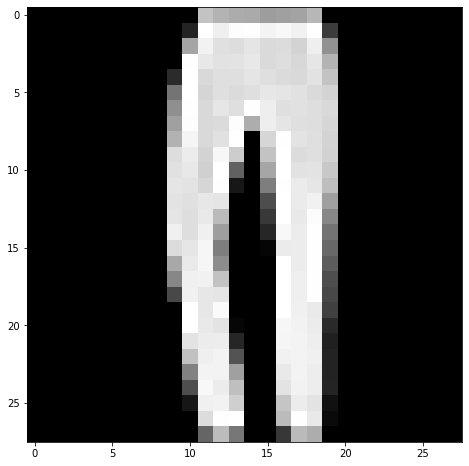

In [39]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [40]:
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.5056838728785258
1-Epoch Cost = 0.4508258365933834
2-Epoch Cost = 0.4505020481571162
3-Epoch Cost = 0.45037822059602356
4-Epoch Cost = 0.4503153299204688


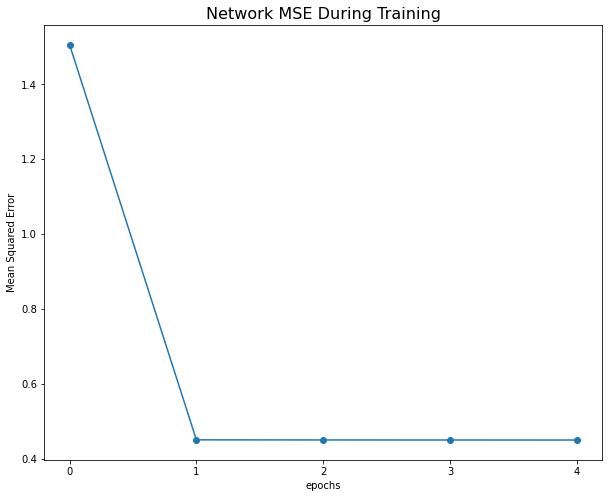

In [41]:
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()


predicted digit is: 2
actual digit is: 0


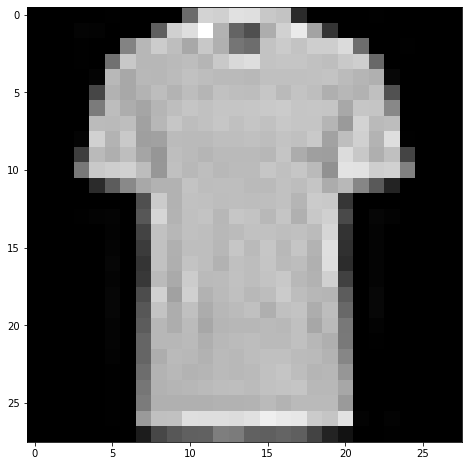

In [42]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 9


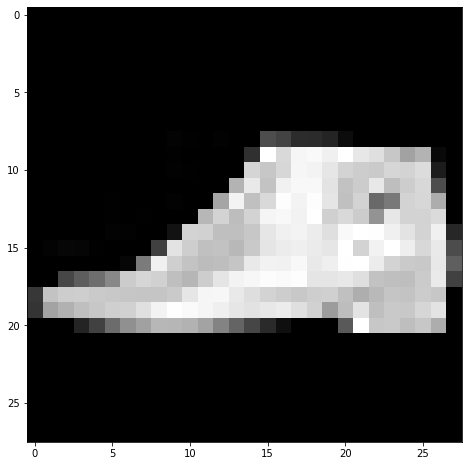

In [43]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 9


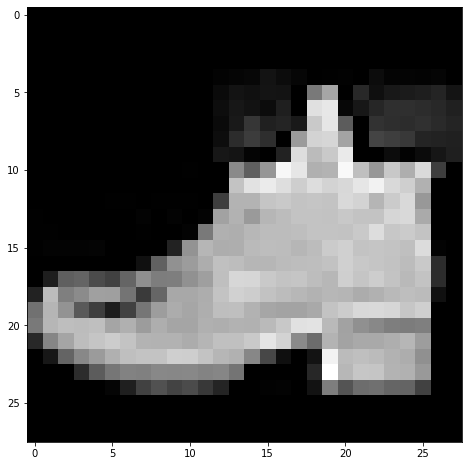

In [44]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 1


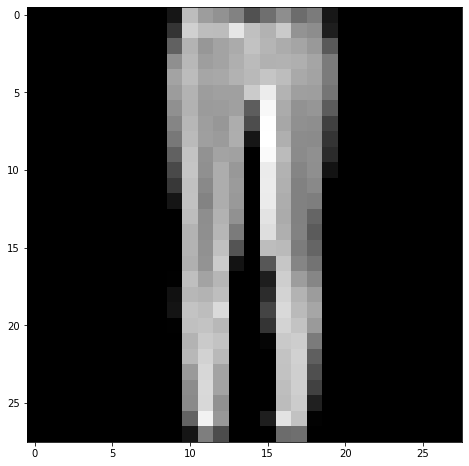

In [45]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 7


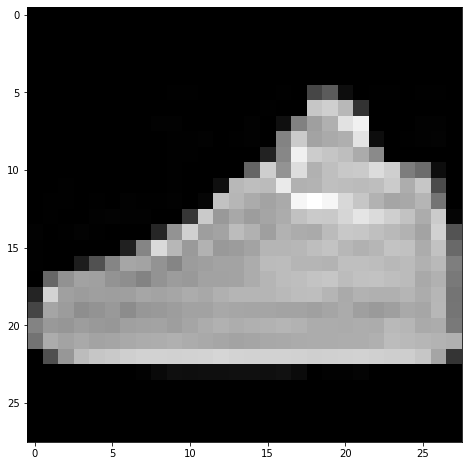

In [46]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 9


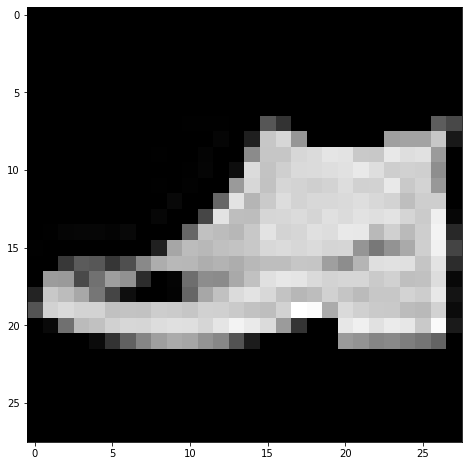

In [47]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 1


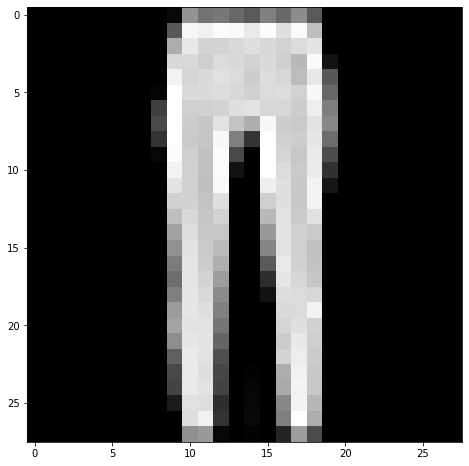

In [48]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

---

## Classification Error
Let us now calculate the classification percentage on the testing data for our trained dense neural network. Recall that this is simply the number of correct labels divided by the total number of data points:

This can be done by running the following code. 


---

In [49]:
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.1

In [50]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [51]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) =mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [52]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)])


2022-05-02 20:36:26.346600: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.9775655 , -0.4231214 ,  0.33014065,  1.1348319 ,  1.5287809 ,
         0.70930296,  0.3488849 ,  1.4746897 ,  0.09685661, -0.64546174]],
      dtype=float32)

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [55]:
loss_fn(y_train[:1], predictions).numpy()

3.6205552

In [56]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5285 - accuracy: 0.8129
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3969 - accuracy: 0.8553
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3654 - accuracy: 0.8653
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3449 - accuracy: 0.8742
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3281 - accuracy: 0.8790


In [58]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3628 - accuracy: 0.8726 - 415ms/epoch - 1ms/step


[0.36281564831733704, 0.8726000189781189]